In [62]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [23]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET - P') if isfile(join('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET - P', f))]
print(onlyfiles)

['101_0001.JPG', '101_0002.JPG', '101_0003.JPG', '101_0004.JPG', '101_0005.JPG', '101_0006.JPG', '101_0007.JPG', '101_0008.JPG', '101_0009.JPG', '101_0010.JPG', '101_0011.JPG', '101_0012.JPG', '101_0013.JPG', '101_0014.JPG', '101_0015.JPG', '101_0016.JPG']


In [24]:
def find_biggest_contour(image):
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # Isolate largest contour
    biggest_contour = max(contours, key=cv2.contourArea)
    # Draw just largest contour
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return mask

In [25]:
# Blur image slightly
def bluringImage(image):
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    min_red = np.array([8,0,0])
    max_red = np.array([55,255,255])
    image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)
    '''print("--------------------------------------------------")
    print(cv2.inRange(image_blur_hsv, min_red, max_red))
    print("--------------------------------------------------")'''
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    # Fill small gaps
    image_red_closed = cv2.morphologyEx(image_red1, cv2.MORPH_CLOSE, kernel)
    # Remove specks
    image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
    return image_red_closed_then_opened

In [26]:
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    return img

In [51]:
def getVectorCaracteristicas(image,mask):
    vector=[]
    image1=image.copy()
    #print(r)
    for i in range(len(mask)):
        for j in range(len(mask[i])):
            if(j==255):
                #print(image[i][j])
                vector.append(image1[i][j])
    #print(vector)
    return vector

In [65]:
def mediaVector(vector_caracteristicas):
    return np.mean(vector_caracteristicas)
def varianzaVector(vector_caracteristicas):
    return np.var(vector_caracteristicas)
def asimetriaVector(vector_caracteristicas):
    return stats.skew(vector_caracteristicas)

101_0001.JPG;111.77326968973748;466.1419107888427;1.933238357775228161.2291169451074;460.5632572154408;4.92935922211116852.42959427207637;403.1185513866975;6.972720975478067
101_0002.JPG;98.94539249146757;130.19497023844193;0.0393397169522403453.45392491467577;423.5243275984577;0.594498160075457244.81228668941979;150.13882514647813;0.2943991284771506
101_0003.JPG;129.28080229226362;515.3251615339774;-0.823393214675876768.51002865329512;786.765658738434;0.1724411061164941967.81661891117479;451.4735347000435;-0.292855754098124
101_0004.JPG;182.8646967340591;281.49491231082914;0.4208149955968753104.39813374805598;1242.2427336866215;0.976111132863972798.33592534992223;636.0893314532143;1.230551536673194
101_0005.JPG;184.53886010362694;723.7165382515861;0.40081433607447997.83592400690846;2918.378951261928;0.761593196750279694.93436960276338;1538.7728947234975;0.8479460941319834
101_0006.JPG;97.49918166939443;476.88175055783086;0.0362094403556633542.96563011456629;500.1444815587658;0.7445790

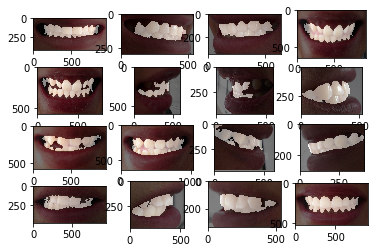

In [67]:
images=[]
indice = 0
for i in (onlyfiles):
    #print(i)
    image = cv2.imread('C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\DATASET - P\\'+i)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,None,fx=1/3,fy=1/3)
    indice=indice+1
    plt.subplot(4,4,indice)
    #print(indice)
    mascara=find_biggest_contour(bluringImage(image))
    r,g,b = cv2.split(image)
    red=getVectorCaracteristicas(r,mascara)
    green=getVectorCaracteristicas(g,mascara)
    blue=getVectorCaracteristicas(b,mascara)
    colores=["RED","GREEN","BLUE"]
    imagen=[red,green,blue]
    caracteristicas=i+";"
    for j in range(0,len(imagen)):
        caracteristicas+=str(mediaVector(imagen[j]))+";"+str(varianzaVector(imagen[j]))+";"+str(asimetriaVector(imagen[j]))
    print(caracteristicas)
    caracteristicas=""
    plt.imshow(overlay_mask(mascara,image))
#print(image)
plt.show()
    
    #cv2.imwrite("C:\\Users\\Cristhian\\TEETH-RECOGNITION-WITH-MACHINE-LEARNING\\Images_HSV\\"+f,hsv_stack)
